In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Lula_Sarah_CS")
!ls

 BackupDataResearch.ipynb      'Reddit Project.gslides'
'Classification Project.gdoc'  'SAT Report 2015-2016.csv'
 RandomForest.pickle	       'Smith_Hurwitz_Avery Code for Tables.do'
 reddit.csv		        Smith_Hurwitz_Avery_DescriptStats.sas
 reddit.ipynb		       'Smith_Hurwitz_Avery Read Me.docx'
'Reddit Project.gdoc'


In [ ]:
from datascience import *

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

from collections import Counter
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from torchtext.vocab import vocab
from torchtext.data.utils import get_tokenizer
from tqdm.notebook import tqdm

import test  # Load tests for this notebook

In [ ]:
#loading data
reddit = pd.read_csv('reddit.csv')

In [ ]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            12854 non-null  object 
 1   Political Lean   12854 non-null  object 
 2   Score            12854 non-null  int64  
 3   Id               12854 non-null  object 
 4   Subreddit        12854 non-null  object 
 5   URL              12854 non-null  object 
 6   Num of Comments  12854 non-null  int64  
 7   Text             2428 non-null   object 
 8   Date Created     12854 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 903.9+ KB


Most columns in the dataset are object values, only Score and Num Comments are numeric. Date Created isn't displayed as a Time series — might not be of use right now.

In [ ]:
#removing the Text column due to the number of missing values and Date Created

reddit = reddit.drop('Text', axis=1)
reddit = reddit.drop('Date Created', axis=1)

In [ ]:
reddit.head(5)

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1


In [ ]:
#distribution of values within Subreddit
reddit['Subreddit'].value_counts()

conservatives          1000
SocialDemocracy         997
alltheleft              997
socialism               975
Libertarian             975
Capitalism              975
progressive             974
republicans             948
democrats               941
feminisms               935
DemocraticSocialism     922
Liberal                 904
anarchocapitalism       637
Communist               574
RadicalFeminism         100
Name: Subreddit, dtype: int64

In [ ]:
#Predicting the political lean of a post
reddit["Political Lean"].value_counts()


#Null hypothesis

Liberal         8319
Conservative    4535
Name: Political Lean, dtype: int64

In [ ]:
reddit["Score"].describe()

count    12854.000000
mean       118.558270
std        498.888034
min          0.000000
25%          3.000000
50%         12.000000
75%         65.000000
max      25055.000000
Name: Score, dtype: float64

In [ ]:
reddit['Num of Comments'].describe()

count    12854.000000
mean        19.055936
std         60.381567
min          0.000000
25%          1.000000
50%          3.000000
75%         15.000000
max       2150.000000
Name: Num of Comments, dtype: float64

# Exploratory Analysis

(0.0, 1000.0)

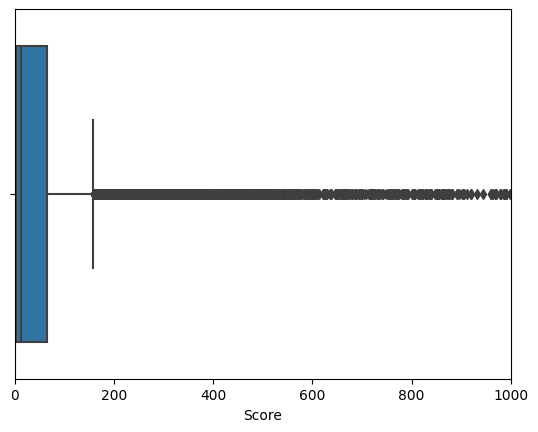

In [ ]:
#Score boxplot

sns.boxplot(data = reddit, x='Score')
plt.xlim(0, 1000)

(0.0, 500.0)

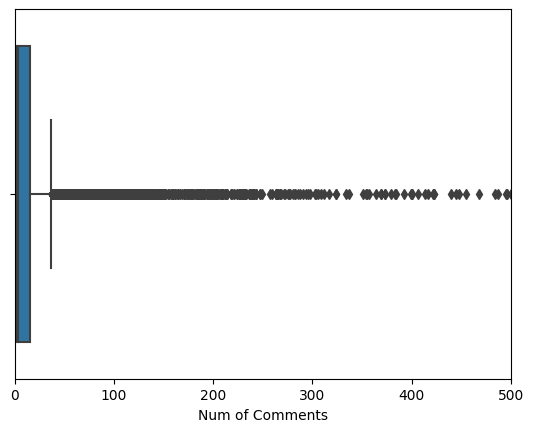

In [ ]:
#Num of comments boxplot

sns.boxplot(data = reddit, x='Num of Comments')
plt.xlim(0, 500)

(-107.50000000000003, 1000.0)

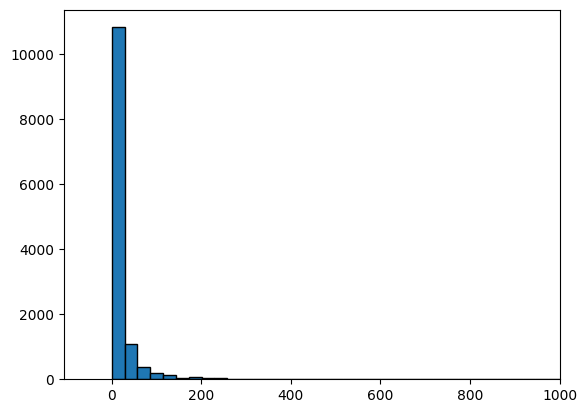

In [ ]:
plt.hist(reddit['Num of Comments'], bins=75)
plt.xlim(right = 1000)

In [ ]:
# Num comments boxplot
sns.boxplot(data=reddit, x='Num of Comments', xlim=(0,1000))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'socialism'),
  Text(1, 0, 'democrats'),
  Text(2, 0, 'DemocraticSocialism'),
  Text(3, 0, 'SocialDemocracy'),
  Text(4, 0, 'progressive'),
  Text(5, 0, 'alltheleft'),
  Text(6, 0, 'Liberal'),
  Text(7, 0, 'feminisms'),
  Text(8, 0, 'Communist'),
  Text(9, 0, 'RadicalFeminism'),
  Text(10, 0, 'Libertarian'),
  Text(11, 0, 'conservatives'),
  Text(12, 0, 'Capitalism'),
  Text(13, 0, 'republicans'),
  Text(14, 0, 'anarchocapitalism')])

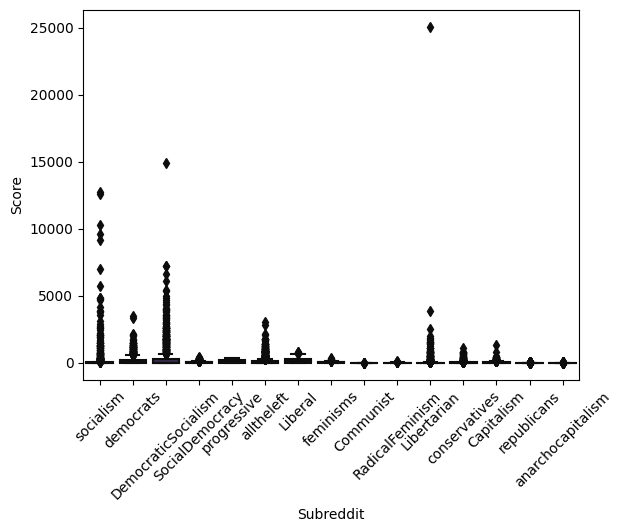

In [ ]:
sns.boxplot(data= reddit, x='Subreddit', y='Score', palette='mako')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'socialism'),
  Text(1, 0, 'democrats'),
  Text(2, 0, 'DemocraticSocialism'),
  Text(3, 0, 'SocialDemocracy'),
  Text(4, 0, 'progressive'),
  Text(5, 0, 'alltheleft'),
  Text(6, 0, 'Liberal'),
  Text(7, 0, 'feminisms'),
  Text(8, 0, 'Communist'),
  Text(9, 0, 'RadicalFeminism'),
  Text(10, 0, 'Libertarian'),
  Text(11, 0, 'conservatives'),
  Text(12, 0, 'Capitalism'),
  Text(13, 0, 'republicans'),
  Text(14, 0, 'anarchocapitalism')])

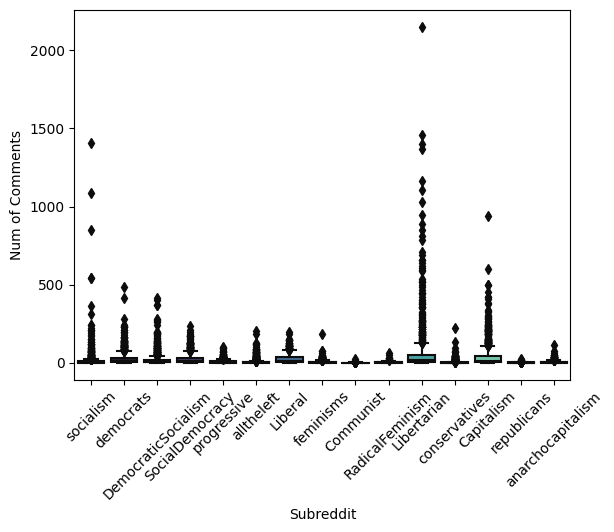

In [ ]:
sns.boxplot(data= reddit, x='Subreddit', y='Num of Comments', palette='mako')
plt.xticks(rotation=45)

In [ ]:
#word cloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate(''.join(reddit['Title']))

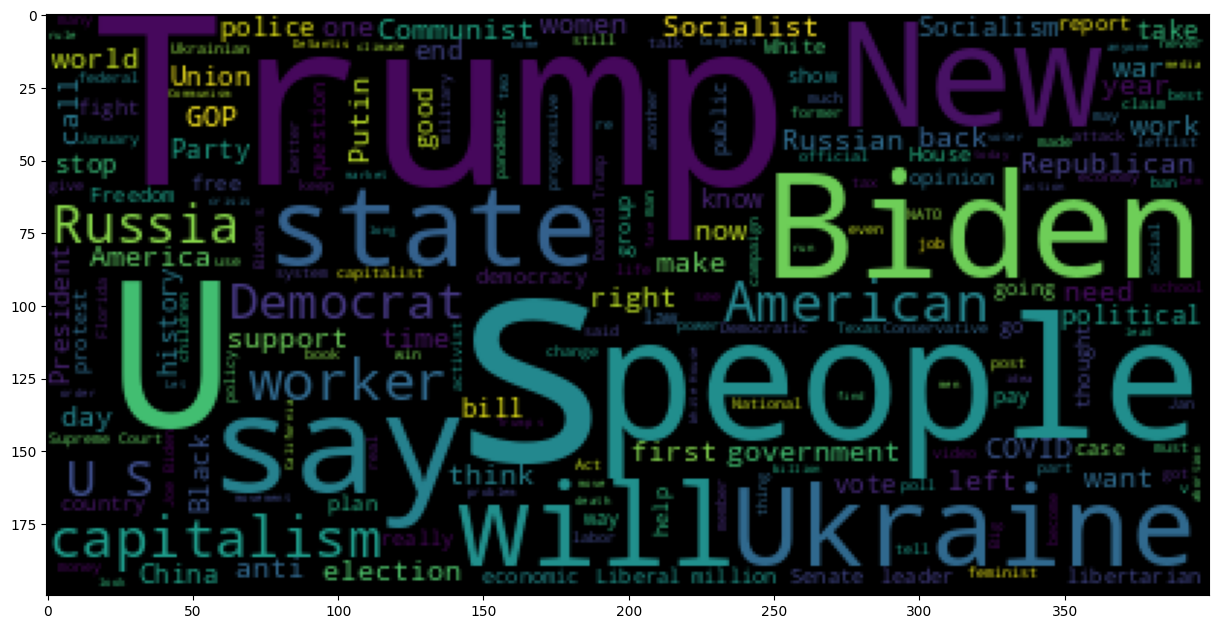

In [ ]:
f, ax = plt.subplots(figsize = (15, 30))

plt.imshow(wordcloud)

<Axes: xlabel='Score', ylabel='Num of Comments'>

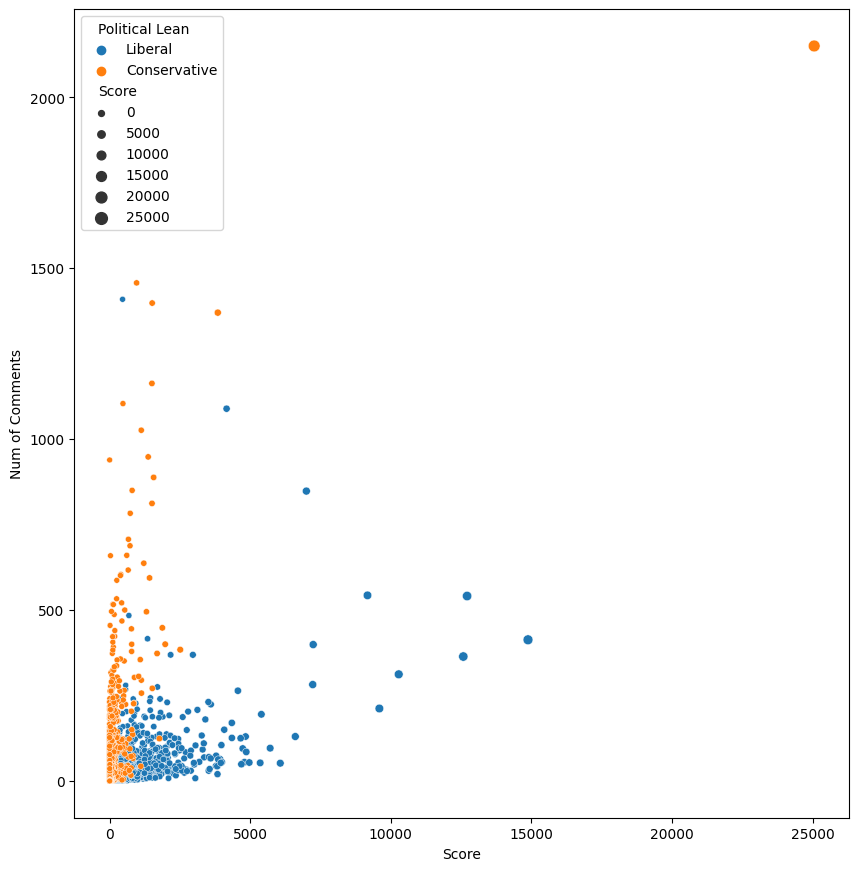

In [ ]:
#scatterplot of number of comments and upvotes categorized by political lean.
f, ax = plt.subplots(figsize = (10, 10.5))
sns.scatterplot(x = reddit['Score'], y= reddit['Num of Comments'], data = reddit, size=reddit['Score'], hue= reddit['Political Lean'], ax = ax)

# Hypothesis Testing

In [ ]:
#hypothesis testing

upvotes = reddit.groupby(['Political Lean']).mean() #grouping by political lean to analyze score and comments
upvotes_by_lean = upvotes['Score']
#splitting into conservative and liberal upvote avg

conservative_upvotes = upvotes_by_lean[0]
liberal_upvotes = upvotes_by_lean[1]

#observed diff
observed_diff = abs(upvotes_by_lean[1] - upvotes_by_lean[0])
observed_diff

<ipython-input-25-0a15258e54b4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes = reddit.groupby(['Political Lean']).mean() #grouping by political lean to analyze score and comments


121.72814183283893

In [ ]:
#method replicates sampling and finding the difference between liberal and conservative score (upvotes)
def mean_diff(sample, group, feature):
  upvotes_by_group = sample.groupby([group]).mean()
  upvotes_series = upvotes_by_group[feature]
  upvote_diff = abs(upvotes_series[1] - upvotes_series[0])
  return upvote_diff

#political_lean = reddit.groupby(['Political Lean'])
observed = mean_diff(reddit, 'Political Lean', 'Score')
print(observed)

121.728141833


<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()


In [ ]:
#shuffle method for ab test; shuffling the 'Political Lean' column
def shuffle_for_abtest(sample_data, group):
  sample_copy = sample_data.copy()
  sample_shuffled = sample_data.sample(frac=1)
  sample_copy[group] = sample_shuffled[group].values
  return sample_copy

In [ ]:
#simulating 1000 times
num_rep = 1000
simulations = make_array()
for i in range(num_rep):
  sample_data = shuffle_for_abtest(reddit, 'Political Lean')
  diff = mean_diff(sample_data, 'Political Lean', 'Score')
  simulations = np.append(simulations, diff)



<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da

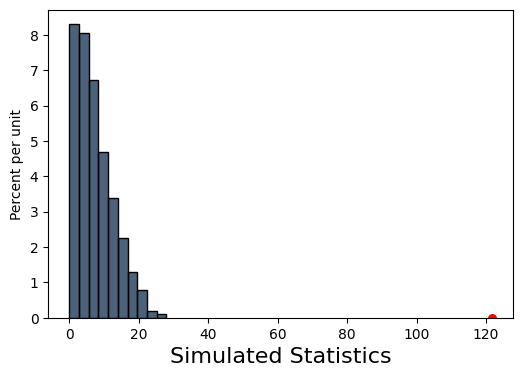

In [ ]:
Table().with_column("Simulated Statistics", simulations).hist()
plt.scatter(observed_diff, 0, color='red', s=30, zorder=2)

In [ ]:
comments_diff = mean_diff(reddit, 'Political Lean', 'Num of Comments')
comments_diff

<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()


10.014716991284548

In [ ]:
num_rep = 1000
simulations = make_array()
for i in range(num_rep):
  sample_data = shuffle_for_abtest(reddit, 'Political Lean')
  diff = mean_diff(sample_data, 'Political Lean', 'Num of Comments')
  simulations = np.append(simulations, diff)


<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da91>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upvotes_by_group = sample.groupby([group]).mean()
<ipython-input-26-70506293da

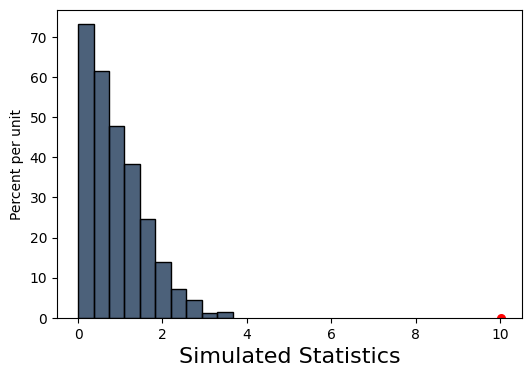

In [ ]:
Table().with_column("Simulated Statistics", simulations).hist()
plt.scatter(comments_diff, 0, color='red', s=30, zorder=2)

# Model Exploration, Training, and Testing

Conservative posts tend to have more comments, leading there to be more interaction or controversy in the posts. Liberal ones however tend to have more upvotes, leading them to be more popular.

In [ ]:
import nltk
tokenized_titles = []
for index, row in reddit.iterrows():
    title = row['Title']
    tokens = nltk.word_tokenize(title)
    tokenized_titles.append(tokens)

In [ ]:
tokenized_titles[:10]

[['No',
  'matter',
  'who',
  'someone',
  'is',
  ',',
  'how',
  'they',
  'look',
  'like',
  ',',
  'what',
  'language',
  'they',
  'speak',
  ',',
  'what',
  'they',
  'wear',
  ',',
  'remember',
  'the',
  'human',
  '.',
  'For',
  'the',
  'sake',
  'of',
  'humanity',
  ',',
  'the',
  'working',
  'class',
  'can',
  'and',
  'must',
  'unite',
  'across',
  'all',
  'arbitrary',
  'boundaries',
  '.'],
 ['Biden', 'speech', 'draws', '38.2', 'million', 'U.S.', 'TV', 'viewers'],
 ['State', 'of', 'the', 'union'],
 ['We', 'Should', 'Just', 'Give', 'Poor', 'People', 'Money'],
 ['Do', 'it', 'for', 'the', 'Dew'],
 ['Proposed',
  'Bill',
  'Would',
  'Allow',
  'Kids',
  'With',
  'Contagious',
  'Diseases',
  'To',
  'Attend',
  'Schools'],
 ['3',
  'House',
  'Republicans',
  'voted',
  'against',
  'a',
  'bipartisan',
  'resolution',
  'to',
  'stand',
  "'steadfastly",
  "'",
  'with',
  'the',
  'Ukrainian',
  'people'],
 ['If',
  'you',
  "'re",
  'bombing',
  'civilian',

In [ ]:
#creating alternate dataset "Reddit Labeled" with just the Title column and also appending Subreddit to title and assigning label

#method converting label to numeric
def label_wrapper(l):
    if l == "Liberal":
        return 1
    elif l == "Conservative":
        return 2
    else:
        raise ValueError()

def parse_file(df):
    df_parsed = []

    for index, row in df.iterrows():
      label_lean = label_wrapper(row['Political Lean'])
      df_parsed.append([row['Title'], row['Subreddit'], label_lean, row['Score'], row['Num of Comments']])

    return df_parsed


reddit_parsed = parse_file(reddit)
print(reddit_parsed[:10])

[['No matter who someone is, how they look like, what language they speak, what they wear, remember the human. For the sake of humanity, the working class can and must unite across all arbitrary boundaries.', 'socialism', 1, 1, 0], ['Biden speech draws 38.2 million U.S. TV viewers', 'democrats', 1, 6, 1], ['State of the union', 'DemocraticSocialism', 1, 1, 1], ['We Should Just Give Poor People Money', 'SocialDemocracy', 1, 7, 3], ['Do it for the Dew', 'democrats', 1, 6, 1], ['Proposed Bill Would Allow Kids With Contagious Diseases To Attend Schools', 'progressive', 1, 3, 5], ["3 House Republicans voted against a bipartisan resolution to stand 'steadfastly' with the Ukrainian people", 'democrats', 1, 11, 4], ["If you're bombing civilian targets, you're the bad guy.", 'alltheleft', 1, 0, 2], ['Every city have to government their resources and give best quality producen to a country environment. And stop financing Political partis which cost 100x govermant spending.', 'socialism', 1, 0, 2

In [ ]:
#turning reddit_parsed into a dataframe

reddit_parsed_df = pd.DataFrame(reddit_parsed)
reddit_parsed_df.columns = ['Title', 'Subreddit', 'Label', 'Score', 'Num of Comments']

In [ ]:
reddit_parsed_df.head()

,Title,Subreddit,Label,Score,Num of Comments
0,"No matter who someone is, how they look like, ...",socialism,1,1,0
1,Biden speech draws 38.2 million U.S. TV viewers,democrats,1,6,1
2,State of the union,DemocraticSocialism,1,1,1
3,We Should Just Give Poor People Money,SocialDemocracy,1,7,3
4,Do it for the Dew,democrats,1,6,1


In [ ]:
#split into Train and Test set
from sklearn.model_selection import train_test_split
y=reddit_parsed_df['Label']
X=reddit_parsed_df.drop(['Label'],1)
X_train, X_test, y_train,  y_test = train_test_split(X,y, random_state = 0, train_size = 0.7)

<ipython-input-15-1fae6ca098c4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=reddit_parsed_df.drop(['Label'],1)


In [ ]:
#joining into Train_data and Test_data

Train_data = pd.concat([X_train,y_train],1).reset_index(drop=True)
Test_data = pd.concat([X_test,y_test],1).reset_index(drop=True)

<ipython-input-16-28fdf4d559cc>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Train_data = pd.concat([X_train,y_train],1).reset_index(drop=True)
<ipython-input-16-28fdf4d559cc>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Test_data = pd.concat([X_test,y_test],1).reset_index(drop=True)


In [ ]:
Train_data.head()

,Title,Subreddit,Score,Num of Comments,Label
0,Honduras begins election vote recount after fr...,Liberal,3,0,1
1,Video – Ecosocialist Alliance Open Meeting – B...,alltheleft,11,1,1
2,Democrats quietly explore barring Trump from o...,democrats,344,86,1
3,Republican congressional candidates have a 49-...,conservatives,13,0,2
4,Belgium approves 4-day week and gives employee...,Libertarian,96,241,2


In [ ]:
train_iter = []
for index, row in Train_data.iterrows():
  train_iter.append((int(row['Label']), row['Title']))

test_iter = []
for index, row in Test_data.iterrows():
  test_iter.append((int(row['Label']), row['Title']))


from nltk.tokenize import word_tokenize
from nltk.lm import Vocabulary
from collections import Counter

counter = Counter()
for (label, text) in train_iter:
  counter.update(word_tokenize(text))

vocab = Vocabulary(counter, unk_cutoff=10)

In [ ]:
test = Test_data.sample(1)
test_title = Test_data['Title'].iloc[2345]
test_title

'The Suicide of a January 6 Defendant: ‘They Broke Him’'

In [ ]:
!pip install xformers
from xformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.4 MB/s eta 0:00:00


ImportError: ignored

In [ ]:
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
classifier(test_title)

NameError: ignored

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
%matplotlib inline

In [ ]:
Train_data.shape

(8997, 5)

In [ ]:
vectorizer = TfidfVectorizer(min_df= 1, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(Train_data['Title']).toarray()
final_features.shape

(8997, 81237)

In [ ]:
y_train.shape

(8997,)

In [ ]:
X = Train_data['Title']
Y = Train_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)



In [ ]:
ytest = np.array(y_test)

In [ ]:
X_test

2622    Billionaire Elon Musk Praised Ukraine Aid: ‘Ch...
2151    If Jeff Bezos has 200 Billion. He Could Give e...
4756    Why is Socialism so Prevalent in Africa? | Geo...
1537    Trump Takes A Victory Lap After Pennsylvania S...
7389    Republicans Have Committed Dozens Of Major Act...
                              ...                        
4077      Trump's TRUTH Social appears on Apple App Store
8301                                 Crazy how that works
7797    [Request] I'm looking for readings or other ma...
2742           Bidenomics Is ‘America First’ With a Brain
2482                it’s ok, libs. we know you don’t read
Name: Title, Length: 2700, dtype: object

In [ ]:
print(classification_report(ytest, model.predict(X_test)))
#print(confusion_matrix(ytest, model.predict(X_test)))


              precision    recall  f1-score   support

           1       0.76      0.84      0.80      1779
           2       0.62      0.50      0.55       921

    accuracy                           0.72      2700
   macro avg       0.69      0.67      0.68      2700
weighted avg       0.71      0.72      0.71      2700



In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest, model.predict(X_test))

0.80032076984763434

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, model.predict(X_test))

0.72333333333333338

In [ ]:
y_pred = model.predict(X_test[:10])
y_pred

array([2, 1, 2, 1, 1, 2, 2, 2, 2, 1])

In [ ]:
y_true = y[:10]
print(y_true)
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Label, dtype: int64
[[4 6]
 [0 0]]
